##  知然算法【2】灰色模型GM(1,1)


### 0、算法适用

 + 适用于短期预测；
 + 样本条数大于4即可建模；
 + 不适用于较大震荡性数据；


### 1、符号说明

+ 原始数据序列：$x^{0}(k), k=1,2,……,n;n$为数据样本条数； 

+ 一次累加数据序列：$x^{1}(k)=\sum_{j=1}^{k}x^{0}(j), k=1,2,……,n；$

+ 累加数据预测序列：$\hat{x}^{1}(k), k=1,2,……,n$


### 2、模型背景

白色系统：系统的内部信息是完全已知的。黑色系统：系统的内部信息是完全未知的，只能通过它与外界的联系来加以观测研究，也就是可以知道该系统的输入输出关系，但不知道它内部是如何实现这种关系的。灰色系统：介于前面两者之间，系统内的一部分信息是已知的，另一部分信息是未知的。

灰色系统理论是由我国著名学者邓聚龙教授于1982年创立的。该理论是将具有潜在规律的时间序列数据经累加生成后，使其变为具有指数增长规律的上升形状数列，而一阶微分方程解的形式是指数增长形式，所以可对累加生成后的数列建立微分方程模型。


### 3、模型步骤

要求每个数据之间的时间间隔必须是一致的，并且不存在缺失值。

+ **STEP1:** 对数据序列进行级比检验，当所有级比值$\lambda(j)$在区间$[e^{-2/(n+1)}, e^{2/(n+1)}]$内，可建立模型；否则需要对数据进行平移转
换，也就是将该数据序列同时加上一个适当的系数$\beta$(需要保存该系数，预测时应再减去该系数)，使得级比值全部在区间内，其中级比值：
$$\lambda(j) = \frac{x^{0}(j-1)}{x^{0}(j)}, j=2,3,……,n$$
此时新构成的目标数据序列为：
$$x^{0}(k)=x^{0}(k)+\beta$$

+ **STEP3:** 对数据序列计算一次累加数据序列$x^{1}(k)$；
+ **STEP4:** 对一次累加序列计算均值序列：
$$Z^{1}(k) = \frac{x^{1}(k-1)+x^{1}(k)}{2}, k=2,3,……,n$$

+ **STEP5:** 计算模型参数构建的矩阵：

$$Y=\begin{bmatrix} x^{0}(2) \\ x^{0}(3) \\ …  \\x^{0}(n)\end{bmatrix}$$

  
$$X = \begin{bmatrix} -Z^{1}(2) & 1 \\ -Z^{1}(3) & 1 \\ … & …\\-Z^{1}(n) & 1 \end{bmatrix}$$
       

计算参数

$$W = (X^{T} X)^{-1} X^TY,W=\begin{bmatrix} a\\ b\end{bmatrix}$$

其中$a$为发展系数，$b$为作用量；

+ **STEP7:** 时间响应表达式：

$$\hat{x}^{1}(t) = ({x}^{0}(1) - \frac{b}{a})e^{-a(t-1)} + \frac{b}{a}, t=1,2…,n,…$$


目标序列的预测模型为：

$$ \hat{x}^{0}(1)={x}^{0}(1)$$$$ \hat{x}^{0}(t) = \hat{x}^{1}(t) - \hat{x}^{1}(t-1), t=2, 3, …,n,…$$



### 4、模型效果检验

#### 4.1 残差

$$\eta_{j} = {x}^{0}(j) - \hat{x}^{0}(j), j=1,2,3,…,n$$


#### 4.2 相对误差

$$\bigtriangleup_{j} = \frac{\eta_{j}} {{x}^{0}(j)}, j=1,2,3,…,n$$

#### 4.3 平均相对误差

$$\epsilon = \frac{\sum_{j=1}^{n}|\bigtriangleup_{j}|}{n}$$

#### 3.4 级比偏差

$$\rho_{j} = 1- \frac{1-0.5a}{1+0.5a}\lambda(j), j=2,3,…n$$


#### 4.5 后验差比

等于残差序列方差与原始数据序列方差的比值

$$c=\frac{S_{\eta}}{S_{x^{0}(k)}}=\frac{\frac{1}{n}\sum_{j=1}^{n}(\eta_{j} -\bar{\eta})^{2}}{\frac{1}{n}\sum_{j=1}^{n}(x^{0}(j) -\bar{x})^{2}}$$

其中$$\bar{\eta}=\frac{1}{n}\sum_{j=1}^{n}\eta_{j},\bar{x}=\frac{1}{n}\sum_{j=1}^{n}x^{0}(j)$$

#### 4.6 小概率误差

$$p=P\{|\eta_{j} - \bar{\eta}|<0.6745 \sqrt{S_{\eta}}\}$$


#### 模型效果评判


| 模型效果评判 |  $$p$$ | $$c$$ |
| :----: | :----: | :----: |
| 好   | $$0.95 \leq p$$ | $$c \leq 0.35$$ |
| 合格  | $$0.8 \leq p < 0.95$$ | $$0.35 <c \leq 0.5$$ |
| 勉强  | $$0.7 \leq p < 0.8$$ | $$0.5 < c \leq 0.65$$ |
| 不合格  | $$p<0.7$$ | $$ c > 0.65$$ |

根据p和c值综合判断，选取两者的模型评判结果较差的作为最终的评判结果。





### 5、Python3实现

In [2]:
import pandas as pd
import numpy as np
from math import e
from IPython.display import Latex
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  

In [24]:
class GM:
    
    def __init__(self, data, M=10, A=None):
        
        self.data = data  # df格式，第一列时间序列，第二类是数据系列
        self.M = M        # 预测未来的期数，
        self.A = A        # 数据系列达到A值需要的期数
        
        # 打印结果标识
        self.title_sign = 1
        
        # 模型精度评判标准字典
        self.signdict ={0:'好',1:'合格',2:'勉强',3:'不合格'}
        
        self.p_rule = [[0.95,0.8,0.7],'<=','<']
        self.c_rule = [[0.35,0.5,0.65],'>=','>']
    
    # 根据数值和规则评判，获得最终结果
    def getmodelresult(self,n,exrule):
        nulist, mind, maxd = exrule
        for kin, kva in enumerate(nulist):
            if kin == 0:
                if eval('%s%s%s' % (kva, mind, n)):
                    return kin
            elif kin == len(nulist) - 1:
                if eval('%s%s%s' % (n, maxd, kva)):
                    return kin+1
            else:
                if eval('%s%s%s%s%s' % (kva, mind, n, maxd,nulist[kin-1])):
                    return kin

    # 级比检验，不满足在计算平移参数
    def jibicheck(self):
        # 目标数据序列
        targetdata = self.data.values[:, 1].T
        # 计算级比值区间
        n = len(targetdata)
        min_tap = round(np.power(e,(-2/(n+1))), 6)  # 最小值
        max_tap = round(np.power(e, (2/(n+1))), 6)  # 最大值
        
        checksign = 1
        multi = 0
        start_number = np.mean(targetdata) # 平移系数的起始值
        while checksign:
            # 计算平移参数
            new_c = round(multi * start_number, 1)
            new_last_data = targetdata + new_c
            checksign = 0
            # 级比数据
            jibidata = ['%.4f' % round(f, 4) for f in new_last_data[:-1] / new_last_data[1:]]
            if not multi:
                self.jibi = jibidata
            for kk in jibidata:
                if float(kk) < min_tap or float(kk) > max_tap:
                    checksign = 1
            if not checksign:
                self.transc = new_c
                break
            multi += 0.001
        # 平移参数
        self.transpara = new_c
        # 打印原始数据
        print('(%s) 级比检验\n' % self.title_sign)
        self.title_sign += 1
        jibidatadf = pd.DataFrame()
        jibidatadf['原始数据'] = [str(f) for f in targetdata]
        if multi:
            jibidatadf['平移数据(参数%s)'% new_c] = [str(k) for k in new_last_data]
  
        jibidatadf['级比值区间[%s, %s]'%(min_tap, max_tap)] = ['_'] + [str(j) for j in jibidata]
        print(jibidatadf)
        if multi:
            return jibidatadf, '平移数据(参数%s)'% new_c
        else:
            return jibidatadf, '原始数据'
    

    # 根据参数输出预测方程
    def outputstr(self):
        base_str = r'$\hat{x}^{1}(t)=(x^{0}(t)-\frac{%s}{%s})e^{%s(t-1)} + \frac{%s}{%s},t=1,2,…k,…$' % (self.B, self.a, -self.a, self.B, self.a)
        return base_str
        
    # 建立灰色预测模型GM(1,1)
    def build_gm(self):
        gmdata, name=  self.jibicheck()
        # 累加数据
        adddata = pd.DataFrame()
        adddata['累加数据'] = np.cumsum(gmdata[name].values.astype(float))
        
        print('(%s) 累加生成序列\n' % self.title_sign)  
        self.title_sign += 1
        print(adddata)
        
        # 对目标特征计算均值序列
        print('(%s) 均值序列\n' % self.title_sign)
        self.title_sign += 1
        avgdata = pd.DataFrame()
        adddata['累加数据'] = adddata['累加数据'].astype(float)
        avgdata['均值数据'] = [str(k) for k in (adddata['累加数据'].values[:-1] + adddata['累加数据'].values[1:])/2]
        print(avgdata)
        # 构建矩阵
        print('(%s) 构建矩阵\n' % self.title_sign)

        print('(%s.1) 矩阵X\n' % self.title_sign)

        X = np.ones((len(avgdata), 1))
        cx = np.array([0-avgdata.values[:,0].astype(float)]).T.astype(str)
        X = np.hstack((cx,X))
        print(X)
        print('(%s.1) 矩阵Y\n' % self.title_sign)
     
        Y = np.array([gmdata[name].values[1:]]).T
        print(Y)
        self.title_sign +=1
        
        # 计算参数
        print('(%s)计算参数a和B\n' % self.title_sign)
        
        X= X.astype(float)
        Y = Y.astype(float)
        
        M = np.array(np.matmul(np.matmul(np.matrix(np.matmul(X.T, X)).I, X.T),Y))
        self.a = M[0][0]
        self.B= M[1][0]
        
        print('a为',self.a)
        print('B为',self.B)
        
        self.title_sign += 1
        
        return self.outputstr()
        
    # 对模型的预测效果进行分析
    def predictmodel(self):
        print('(%s) 预测效果分析\n' % self.title_sign)

        predictdf = pd.DataFrame()
        # 原始数据
        predictdf['原始数据'] = self.data.values[:,1]
        predata = [self.data.values[:,1][0]]
        # 开始预测
        fsum = predata[0]
        # 判断期数
        if self.M:
            pass
        else:
            self.M = 0
        # 判断达到的值
        if self.A:
            sign = 1
        else:
            sign = 0
            
        pbb = 0
        while pbb < len(self.data)-1+self.M or sign:

            xp = (predata[0]-self.B/self.a) * np.power(e, -self.a * (pbb+1)) + self.B/self.a
            predictnumber = xp-fsum-self.transpara
            if sign:
                if predictnumber >=self.A:
                    sign = 0
                    self.daA = pbb+1 
                    self.daAnum = predictnumber
            if pbb > 99:
                self.daA = '100'
                break
            predata.append(round(predictnumber, 4))
            fsum = xp
            pbb += 1
            
        predictdf['预测数据'] = np.array(predata[:len(self.data)])
        
        predictdf['残差'] = predictdf['原始数据'] -  predictdf['预测数据']
        predictdf['相对误差(%)'] = [round(d,2) for d in (predictdf['残差'] /  predictdf['原始数据'])*100]
        predictdf['级比偏差'] = ['-'] + [1-(1-self.a)/(1+self.a) * float(h) for h in self.jibi]
        print(predictdf)
        
        print('(%s.1) 平均相对误差(%%):%s' % (self.title_sign, np.mean(np.abs(predictdf['相对误差(%)']))))
        
        # 计算方差比
        varee = np.var(predictdf['残差'].values)
        datavar = np.var(predictdf['原始数据'].values)
        c = varee / datavar
        print('(%s.2) 后验差比:%s' % (self.title_sign,c))
        avge = predictdf['残差'].values - np.mean(predictdf['残差'].values)
        p = len([h for h in avge if abs(h)<0.6745*(datavar ** 0.5)]) / len(avge)
        print('(%s.3) 小概率误差:%s' % (self.title_sign, p))
        
        modelclass = self.signdict[max(self.getmodelresult(p, self.p_rule), self.getmodelresult(c, self.c_rule))]
        print('(%s.4) 模型结果评判【好，合格，勉强，不合格】:%s' % (self.title_sign, modelclass))
        
        
        self.title_sign += 1
        
        print('(%s) 模型预测以及图示\n' % self.title_sign)
        
        if self.M:
            print('预测期数%s\n' % self.M)
            all_data = pd.DataFrame()

            all_data[self.data.keys()[0]] = list(self.data.values[:,0]) + ['后(%s)' % (h+1) for h in range(self.M)]
            all_data[self.data.keys()[1]] = list(self.data.values[:,1]) + ['-']*self.M
            all_data['预测数据'] = np.array(predata[:(len(self.data)-1+self.M+1)]).astype(str)

            print(all_data)

            plt.figure(figsize=(10, 10))
            plt.plot(predictdf['原始数据'].astype(float),label='真实数据',marker='s')
            plt.plot(all_data['预测数据'].astype(float),label='预测数据',marker='8', **dict(linestyle=':', color='tab:orange', markersize=5))
            plt.ylabel(self.data.keys()[1])
            plt.xlabel(self.data.keys()[0])
            plt.xticks(list(range(len(all_data)))[::1], all_data[self.data.keys()[0]][::1], rotation=50)
            plt.legend()
            plt.show()
        
        if self.A:
            print('达到预测值%s\n' % self.A)
            if self.daA <= len(self.data):
                print('已经在期数%s达到，值为%s\n' % (self.daA+1, self.daAnum))
            else:
                print('根据预测所需期数为%s,值为%s\n' % (self.daA-len(self.data)+1, self.daAnum))
                
        return predata
            

### 5、数据实例(中美GDP预测比对)

In [25]:
# 2001-2019中美GDP数据
GDP = pd.read_excel('GDP(01-19).xlsx')
GDP

,年,中国GDP(美元),美国GDP(美元)
0,2001,1339395718865,10581821399000
1,2002,1470550015081,10936419054000
2,2003,1660287965662,11458243878000
3,2004,1955347004963,12213729147000
4,2005,2285965892360,13036640230000
5,2006,2752131773355,13814611414000
6,2007,3550342737010,14451858656000
7,2008,4594307032660,14712844084000
8,2009,5101703073086,14448933025000
9,2010,6087163874512,14992052727000


(1) 级比检验

              原始数据 平移数据(参数7840838422908.5) 级比值区间[0.904837, 1.105171]
0    1339395718865         9180234141773.5                         _
1    1470550015081         9311388437989.5                    0.9859
2    1660287965662         9501126388570.5                    0.9800
3    1955347004963         9796185427871.5                    0.9699
4    2285965892360        10126804315268.5                    0.9674
5    2752131773355        10592970196263.5                    0.9560
6    3550342737010        11391181159918.5                    0.9299
7    4594307032660        12435145455568.5                    0.9160
8    5101703073086        12942541495994.5                    0.9608
9    6087163874512        13928002297420.5                    0.9292
10   7551500124203        15392338547111.5                    0.9049
11   8532229986993        16373068409901.5                    0.9401
12   9570406235659        17411244658567.5                    0.9404
13  10475682920594      

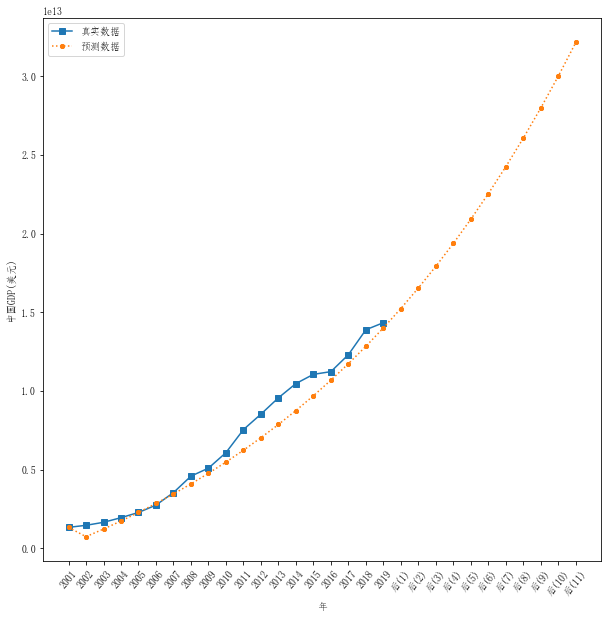

达到预测值30000000000000

根据预测所需期数为10,值为30007116779257.375

预测表达式为：
(1) 级比检验

              原始数据 级比值区间[0.904837, 1.105171]
0   10581821399000                         _
1   10936419054000                    0.9676
2   11458243878000                    0.9545
3   12213729147000                    0.9381
4   13036640230000                    0.9369
5   13814611414000                    0.9437
6   14451858656000                    0.9559
7   14712844084000                    0.9823
8   14448933025000                    1.0183
9   14992052727000                    0.9638
10  15542581104000                    0.9646
11  16197007349000                    0.9596
12  16784849196000                    0.9650
13  17527163695000                    0.9576
14  18224704440000                    0.9617
15  18714960538000                    0.9738
16  19519353692000                    0.9588
17  20580159776000                    0.9485
18  21433226000000                    0.9602
(2) 累加生成序列

            累加数

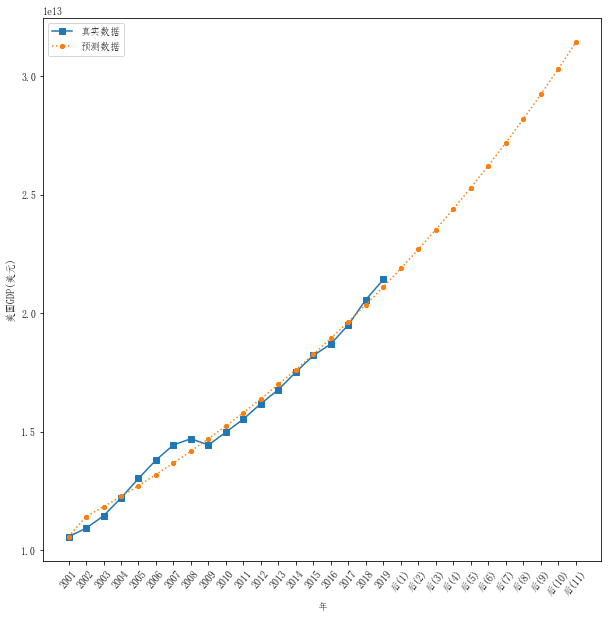

达到预测值30000000000000

根据预测所需期数为10,值为30312136061158.125

预测表达式为：


<IPython.core.display.Latex object>

In [101]:
ChinaGDP = GDP[['年','中国GDP(美元)']]
USAGDP = GDP[['年','美国GDP(美元)']]

# 建立GM(1,1)模型
GMANFANY_China = GM(ChinaGDP,M=11,A=30000000000000)  # M为预测的期数。A为预测达到的值
# 预测表达式
prestrChina = GMANFANY_China.build_gm()
ChinaPredict = GMANFANY_China.predictmodel()
print('预测表达式为：')
Latex(r'%s' % prestrChina)

# 建立GM(1,1)模型
GMANFANY_USA = GM(USAGDP,M=11,A=30000000000000)  # M为预测的期数。A为预测达到的值
# 预测表达式
prestrusa = GMANFANY_USA.build_gm()
USAPredict = GMANFANY_USA.predictmodel()
print('预测表达式为：')
Latex(r'%s' % prestrusa)


### 6、绘制中美GDP预测对比

In [46]:
# 01-19年的真实数据
ChinaReal = GDP[['中国GDP(美元)']].values
USAReal = GDP[['美国GDP(美元)']].values

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]


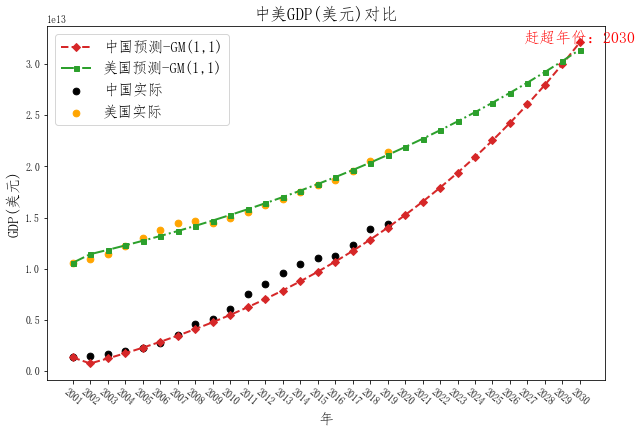

In [100]:
# 计算超越时刻
cc = 0
mm= 0
for kin, kva in enumerate(ChinaPredict):
    if kva > USAPredict[kin]:
        cc = kin
        mm = kva
        break
        
plt.figure(figsize=(10, 6.5))
plt.scatter(range(len(ChinaReal)), ChinaReal,label='中国实际', s=45, color='k')
plt.plot(ChinaPredict,label='中国预测-GM(1,1)',marker='D',color='tab:red',ms=5,linestyle='--',lw=2)
plt.scatter(range(len(USAReal)), USAReal,label='美国实际', s=45, color='orange')
plt.plot(USAPredict,label='美国预测-GM(1,1)',marker='s',color='tab:green',ms=5,linestyle='-.',lw=2)
plt.legend(fontsize=15)
plt.title('中美GDP(美元)对比', fontsize=17)
plt.xlabel('年', fontsize=15)
plt.ylabel('GDP(美元)', fontsize=15)
ctick = [int(2000+h) for h in list(range(1,len(ChinaPredict)+1))]
if cc:
    plt.text(cc, mm, '赶超年份：%s' % ctick[cc],fontsize=16,color='red',horizontalalignment='center')
plt.xticks(list(range(len(ChinaPredict))), ctick, rotation=-40)
plt.show()